In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

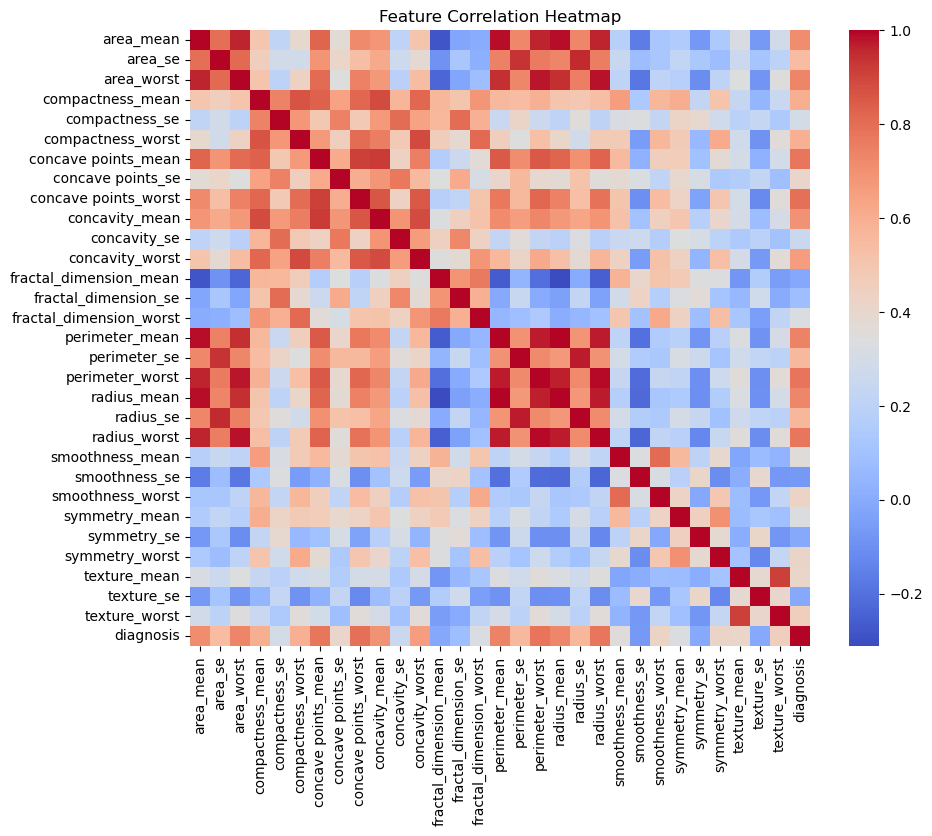

In [11]:
breast_cancer_df = pd.read_csv('breast_cancer.csv')


def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()


plot_correlation_heatmap(breast_cancer_df)

In [27]:
def show_performance_metrics(y_test, y_test_predicted):
    print('PERFORMANCE METRICS')
    print(f"Accuracy: {accuracy_score(y_test, y_test_predicted):.2f} | "
          f"Precision: {precision_score(y_test, y_test_predicted):.2f} | "
          f"Recall: {recall_score(y_test, y_test_predicted):.2f} | "
          f"F1: {f1_score(y_test, y_test_predicted):.2f} ")
    print('Confusion matrix: \n {0}'.format(confusion_matrix(y_test, y_test_predicted)))
    

def show_cv_scores(model, X_train, y_train, cv = 5):
    cv_scores = cross_val_score(model, X_train, np.ravel(y_train), cv = cv)
    print("CV SCORES")
    print(cv_scores)
    print( "Accuracy cv: {0: 0.2f}, Std: {1: 0.2f}".format(np.mean(cv_scores), np.std(cv_scores)) )  

def add_columns_names(X_new, X):
    selected_features_names = [
        X.columns[j]
        for i in range(len(X_new.columns))
        for j in range(len(X.columns))
        if X_new.iloc[:, i].equals(X.iloc[:, j])
    ]
    
    X_new.columns = selected_features_names
    return X_new


def get_X_with_select_features_by_mutual_information(X, y, percentile = 30):
    select_features = SelectPercentile(mutual_info_classif, percentile = percentile)

    X_new = select_features.fit_transform(X, y)
    X_new = pd.DataFrame(X_new)
    return add_columns_names(X_new, X)


def compute_correlation_matrix(dataframe):
    return dataframe.corr()


def get_highly_correlated_features(correlation_matrix, target_column, threshold = 0.2):
    target_correlation = correlation_matrix[target_column].sort_values(ascending = False)
    important_features = target_correlation[target_correlation.abs() > threshold].index.tolist()
    important_features.remove(target_column)
    return important_features


def get_X_with_select_features_by_correlation(breast_cancer_df, target_column='diagnosis', threshold = 0.2):
    correlation_matrix = compute_correlation_matrix(breast_cancer_df)
    important_features = get_highly_correlated_features(correlation_matrix, target_column, threshold)
    return breast_cancer_df[important_features]


def train_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model.fit(X_train, y_train)

    y_test_predicted = model.predict(X_test)

    show_performance_metrics(y_test, y_test_predicted)
    show_cv_scores(model, X_train, y_train, 5)


def train_model_from_file(file_name):
    breast_cancer_df = pd.read_csv(file_name)

    X_selected_by_correlation = get_X_with_select_features_by_correlation(breast_cancer_df)
    y = breast_cancer_df['diagnosis']

    best_model = RandomForestClassifier(class_weight='balanced', n_estimators = 100, max_depth = None, min_samples_split = 2, random_state = 42)

    train_model(X_selected_by_correlation, y, best_model)


train_model_from_file("breast_cancer.csv")

PERFORMANCE METRICS
Accuracy: 0.98 | Precision: 0.98 | Recall: 0.95 | F1: 0.97 
Confusion matrix: 
 [[107   1]
 [  3  60]]
CV SCORES
[0.95       0.95       0.9625     0.93670886 0.96202532]
Accuracy cv:  0.95, Std:  0.01


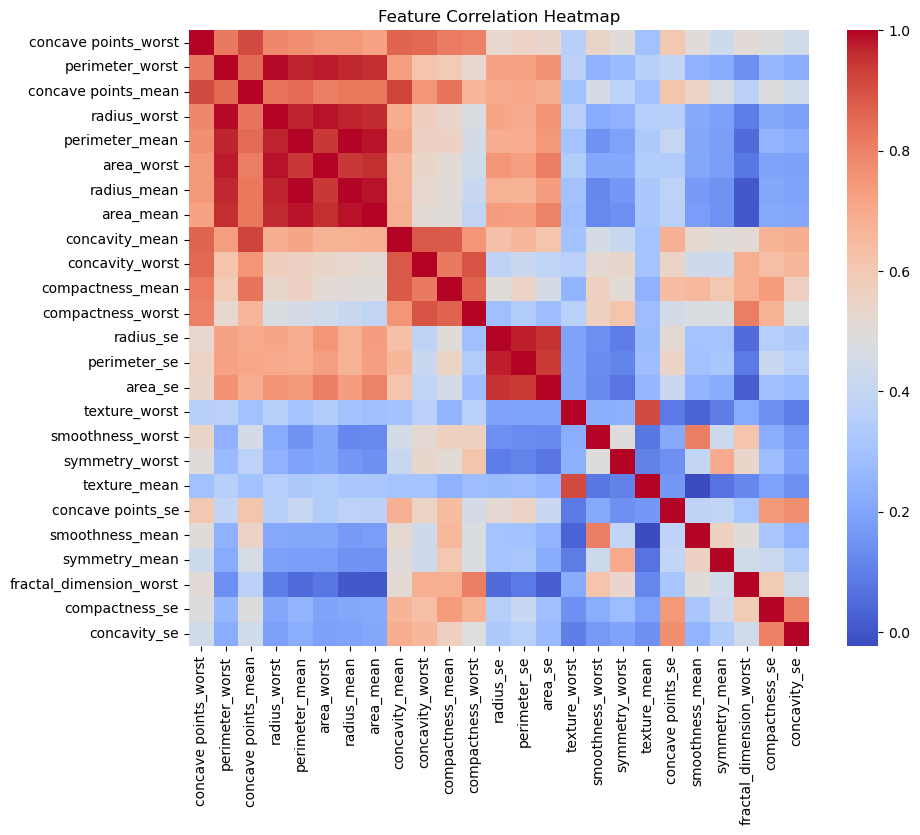

In [13]:
X_selected_by_correlation = get_X_with_select_features_by_correlation(breast_cancer_df)
plot_correlation_heatmap(X_selected_by_correlation)

# Training process

In [35]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

## Base model

In [28]:
from sklearn.tree import DecisionTreeClassifier

train_model(X, y, DecisionTreeClassifier())

PERFORMANCE METRICS
Accuracy: 0.94 | Precision: 0.88 | Recall: 0.95 | F1: 0.92 
Confusion matrix: 
 [[100   8]
 [  3  60]]
CV SCORES
[0.9375     0.9125     0.8875     0.93670886 0.93670886]
Accuracy cv:  0.92, Std:  0.02


In [29]:
percentiles = [10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]

for percentile in percentiles:
    X_selected = get_X_with_select_features_by_mutual_information(X, y, percentile)
    print("percentile: ", percentile)
    train_model(X_selected, y, DecisionTreeClassifier())
    print("\n")

percentile:  10
PERFORMANCE METRICS
Accuracy: 0.87 | Precision: 0.83 | Recall: 0.83 | F1: 0.83 
Confusion matrix: 
 [[97 11]
 [11 52]]
CV SCORES
[0.9125     0.85       0.8625     0.86075949 0.86075949]
Accuracy cv:  0.87, Std:  0.02


percentile:  20
PERFORMANCE METRICS
Accuracy: 0.95 | Precision: 0.95 | Recall: 0.92 | F1: 0.94 
Confusion matrix: 
 [[105   3]
 [  5  58]]
CV SCORES
[0.975      0.9125     0.8875     0.92405063 0.88607595]
Accuracy cv:  0.92, Std:  0.03


percentile:  25
PERFORMANCE METRICS
Accuracy: 0.91 | Precision: 0.89 | Recall: 0.87 | F1: 0.88 
Confusion matrix: 
 [[101   7]
 [  8  55]]
CV SCORES
[0.975      0.9125     0.9125     0.94936709 0.94936709]
Accuracy cv:  0.94, Std:  0.02


percentile:  30
PERFORMANCE METRICS
Accuracy: 0.91 | Precision: 0.87 | Recall: 0.87 | F1: 0.87 
Confusion matrix: 
 [[100   8]
 [  8  55]]
CV SCORES
[0.975      0.9        0.9        0.92405063 0.93670886]
Accuracy cv:  0.93, Std:  0.03


percentile:  35
PERFORMANCE METRICS
Accuracy: 0.

In [30]:
X_selected_40 = get_X_with_select_features_by_mutual_information(X, y, percentile = 40)

train_model(X_selected_40, y, DecisionTreeClassifier())

PERFORMANCE METRICS
Accuracy: 0.94 | Precision: 0.91 | Recall: 0.92 | F1: 0.91 
Confusion matrix: 
 [[102   6]
 [  5  58]]
CV SCORES
[0.925      0.925      0.925      0.93670886 0.93670886]
Accuracy cv:  0.93, Std:  0.01


## Información mutua

In [46]:
X_selected_by_mutual_information = get_X_with_select_features_by_mutual_information(X, y, 30)
train_model(X_selected_by_mutual_information, y, DecisionTreeClassifier())

PERFORMANCE METRICS
Accuracy: 0.93 | Precision: 0.92 | Recall: 0.89 | F1: 0.90 
Confusion matrix: 
 [[103   5]
 [  7  56]]
CV SCORES
[0.975      0.9        0.9        0.96202532 0.93670886]
Accuracy cv:  0.93, Std:  0.03


## Bosque sin tunear

In [38]:
train_model(X, y, RandomForestClassifier(n_estimators=10))

PERFORMANCE METRICS
Accuracy: 0.97 | Precision: 0.98 | Recall: 0.94 | F1: 0.96 
Confusion matrix: 
 [[107   1]
 [  4  59]]
CV SCORES
[0.925      0.9375     0.9625     0.94936709 0.96202532]
Accuracy cv:  0.95, Std:  0.01


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
forest_model_1 = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 42, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
forest_model_2 = grid_search.best_estimator_